# Following will be the steps we will follow to perform linear regression on the dataset.¶

* Step 1 : Import Necessary Libraries
* Step 2 : Load Data
* Step 3 : Start Exploring dataset
* Step 4 : Use Seaborn to visualize the dataset
* Step 5 : Splitting X and y into training and testing sets
* Step 6 : Creating and training a Linear regression object
* Step 7 : Predictions on testing data and metrics
* Step 8 : Plot the learned Linear regression model
* Step 9 : No need to perform the cross validation ?

# Step 1 : Import Necessary Libraries

In [99]:
"""
First of all we will import necessary packages required for our task of exploration,
visualization, analaysis and fitting models and measuring how good they are
"""

#Import numpy and pandas
import numpy as np
#import pandas as pd

#Import seaborn and matplotlib for plotting
import matplotlib.pyplot as plt 
import seaborn as sns

#Magic line to print all matplotlib plots on the same notebook
%matplotlib inline

#Import dataset and linear_model from sklearn
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

# Step 2 : Load Data

In [100]:
"""
Load the diabetes dataset
"""
diabetes = datasets.load_diabetes()

#Use only one feature for our analysis i.e. feature 2
X = diabetes.data[:,np.newaxis, 2]
y = diabetes.target

# Step 3 : Start Exploring dataset

In [101]:
print X.shape
print y.shape

(442, 1)
(442,)


# Step 4 : Use seaborn to visualize the dataset

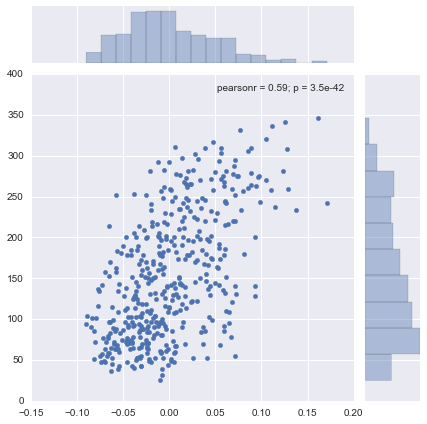

In [102]:
sns.jointplot(x=X[:,0], y=y)

# Step 5 : Splitting X and y into training and testing sets


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

#Scikit does 75% for training and 25% for testing by default
print "X_train shape : " + str(X_train.shape)
print "X_test shape : " + str(X_test.shape)
print "y_train shape : " + str(y_train.shape)
print "y_test shape : " + str(y_test.shape)

X_train shape : (331, 1)
X_test shape : (111, 1)
y_train shape : (331,)
y_test shape : (111,)


# Step 6 : Creating and training a Linear regression object

In [104]:
#Create a linear regression object
lin_reg = LinearRegression()

#Train the model using the training set
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [105]:
#Print the learned intercept and coefficients
print "Intercept : " + str(lin_reg.intercept_)
print "coefficeint : " + str(lin_reg.coef_)

Intercept : 151.45222564
coefficeint : [ 1015.81069855]


# Step 7 : Predictions on testing data and metrics

In [106]:
#Make predictions on test data
y_pred = lin_reg.predict(X_test)

# The mean RSS (Residual Sum of Squares)
RSS = np.mean((y_pred - y_test) ** 2)
print "RSS : " + str(RSS)

#Print RMSE (Root Mean Squared Error)
RMSE = np.sqrt(RSS)
print "RMSE : " + str(RMSE)

#from sklearn import metrics
#print np.sqrt(metrics.mean_squared_error(y_test,y_pred))

RSS : 4309.22121288
RMSE : 65.6446586775


In [107]:
# Variance score : 1 is perfect prediction
print "Variance score : " + str(lin_reg.score(X_test, y_test))

Variance score : 0.174662098653


# Step 8 : Plot the learned Linear regression model

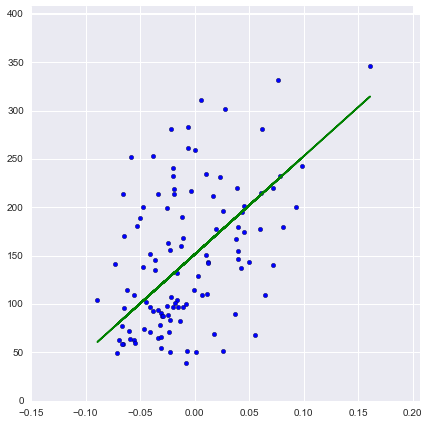

In [108]:
grid = sns.JointGrid(x=X_test[:,0], y=y_test, ratio=50)
grid.plot_joint(plt.scatter)
plt.plot(X_test[:,0], y_pred, color='green')

# Step 9 : No need to perform the cross validation ?